### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4


### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Бармина Ольга Константиновна
##### Группа:   НФИбд-01-19

## Москва 2022
***

### Вариант №12

1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.
2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если количество различных меток классов превышает 4, то уменьшите количество классов.
3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.
4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.
5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.
6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок.
7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.
8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
• наивного байесовского классификатора
• классификатора метода К ближайших соседей для значения К, определенного в п. 6.
9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.
10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

### Индивидуальный вариант:

Echocardiogram Data Set 

Название файла: echocardiogram.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Echocardiogram 

Первый признак: fractional-shortening (столбец No 5) 

Второй признак: wall-motion-score (столбец No 8) 

Третий признак: lvdd (столбец No 7) 

Класс: still-alive (столбец No 2) 

Метод обработки пропущенных значений – медиана признака 

Метод нормализации признаков – нормировка по норме L1 

Алгоритм снижения размерности данных – метод главных компонент (PCA) 

Метод валидации модели – кросс-валидация по 10 блокам 

Показатель качества модели – точность (precision) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram//echocardiogram.data"

df = pd.read_csv(url, sep=',', header=None, on_bad_lines='skip')[[4,7,6,1]] 
# индексы на 1 ниже чем в задании т.к. нумерация с нуля
df

,4,7,6,1
0,0.260,14,4.600,0
1,0.380,14,4.100,0
2,0.260,14,3.420,0
3,0.253,16,4.603,0
4,0.160,18,5.750,1
...,...,...,...,...
126,0.24,12,4.72,1
127,0.28,11,5.47,0
128,0.20,14.5,5.05,0
129,0.14,15,4.36,0


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если количество различных меток классов превышает 4, то уменьшите количество классов.

In [3]:
df = df.replace('?', np.NaN)
df[1] = df[1].astype(int)
df[[4,7,6]] = df[[4,7,6]].astype(float)
df.isnull().sum(axis=0)
# пустые значения в признаках присутствуют, но в метке класса отсутствуют

4     7
7     3
6    10
1     0
dtype: int64

In [4]:
df = df.fillna(df.median())

In [5]:
df.groupby(1).count()
# всего 2 класса

,4,7,6
1,,,
0,88,88,88
1,43,43,43


3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.

In [6]:
X = df[[4,7,6]]
Y = df[1]

In [7]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l1').fit(X)
normalizedX = scaler.transform(X)

print(normalizedX[0:5,:])

[[0.01378579 0.74231177 0.24390244]
 [0.02056277 0.75757576 0.22186147]
 [0.01470588 0.7918552  0.19343891]
 [0.0121308  0.76716532 0.22070387]
 [0.00669176 0.75282309 0.24048515]]


4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.


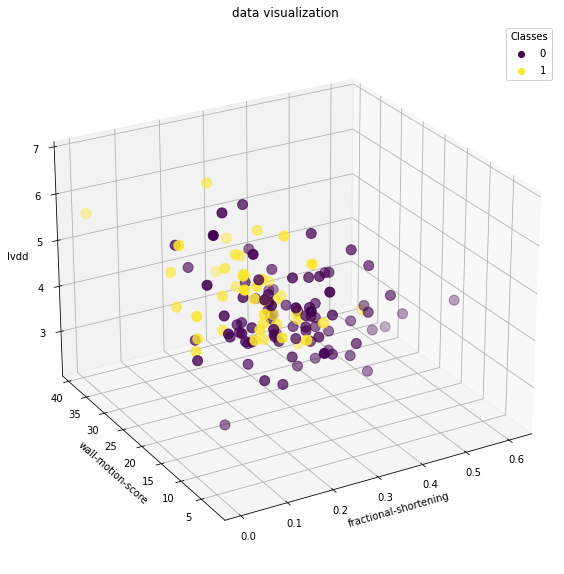

In [8]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = X[4]
ys = X[7]
zs = X[6]
scatter = ax.scatter( xs, ys, zs, c=Y,s=100 )
ax.set_xlabel('fractional-shortening')
ax.set_ylabel('wall-motion-score')
ax.set_zlabel('lvdd')
ax.set_title('data visualization')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

ax.view_init( azim=-120, elev=25 );

5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
PCA_X = pca.fit_transform(X)
PCA_X

array([[-4.31440818e-01,  1.47048400e-01],
       [-4.42532933e-01,  6.51738869e-01],
       [-4.56715019e-01,  1.32562585e+00],
       [ 1.56817677e+00,  1.86820687e-01],
       [ 3.59257176e+00, -9.19821370e-01],
       [-2.43718328e+00,  3.93621348e-01],
       [ 8.08443926e+00, -5.00195172e-01],
       [-4.17741835e-01, -4.99080270e-01],
       [ 1.57833027e+00, -2.95754611e-01],
       [ 1.06623408e+00,  2.83930630e-01],
       [ 3.56011084e+00,  5.97022888e-01],
       [ 1.54606542e+00,  1.19730126e+00],
       [-4.44515353e-01,  7.49412796e-01],
       [-4.49724372e-01,  1.01114743e+00],
       [-2.73474537e+00, -1.10786562e+00],
       [-4.38048758e-01,  4.56233577e-01],
       [ 3.56869214e+00,  1.83263564e-01],
       [ 9.57967146e+00, -2.45222022e-01],
       [-6.40338214e+00, -1.20721313e+00],
       [ 1.25827734e+01, -3.73748194e-01],
       [ 5.08454113e+00, -5.28388388e-01],
       [-5.82725635e-01, -7.19105241e-01],
       [-6.89854945e+00, -1.45251650e+00],
       [-6.

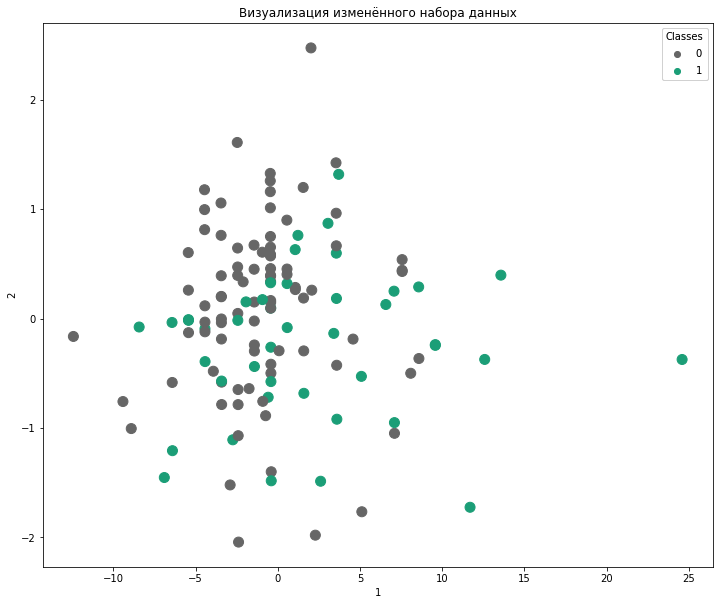

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
scatter = ax.scatter(PCA_X[:,0], PCA_X[:,1], s=100, c=Y, cmap=plt.cm.Dark2_r);
ax.set_xlabel("1")
ax.set_ylabel("2")
ax.set_title("Визуализация изменённого набора данных")

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок.


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(PCA_X, Y, test_size=0.25, random_state=666)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((98, 2), (98,), (33, 2), (33,))

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# k = 5
kNN_clf5 = KNeighborsClassifier(n_neighbors=5)
kNN_clf5.fit(X_train, y_train)
y_pred5 = kNN_clf5.predict(X_test)
sum(y_pred5 == y_test) / len(y_test)

0.6060606060606061

In [13]:
# k = 7
kNN_clf7 = KNeighborsClassifier(n_neighbors=7)
kNN_clf7.fit(X_train, y_train)
y_pred7 = kNN_clf7.predict(X_test)
sum(y_pred7 == y_test) / len(y_test)

0.5757575757575758

In [14]:
# k = 3
kNN_clf3 = KNeighborsClassifier(n_neighbors=3)
kNN_clf3.fit(X_train, y_train)
y_pred3 = kNN_clf3.predict(X_test)
sum(y_pred3 == y_test) / len(y_test)

0.6363636363636364

In [15]:
# k = 2
kNN_clf2 = KNeighborsClassifier(n_neighbors=2)
kNN_clf2.fit(X_train, y_train)
y_pred2 = kNN_clf2.predict(X_test)
sum(y_pred2 == y_test) / len(y_test)

0.6666666666666666

In [16]:
# k = 1
kNN_clf1 = KNeighborsClassifier(n_neighbors=1)
kNN_clf1.fit(X_train, y_train)
y_pred1 = kNN_clf1.predict(X_test)
sum(y_pred1 == y_test) / len(y_test)
# получаем, что оптимальное значение k - 2

0.5454545454545454

7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.


In [17]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        24
           1       0.00      0.00      0.00         9

    accuracy                           0.67        33
   macro avg       0.35      0.46      0.40        33
weighted avg       0.52      0.67      0.58        33



In [18]:
conf_mat=confusion_matrix(y_test,y_pred2)
print(conf_mat)

[[22  2]
 [ 9  0]]


8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
• наивного байесовского классификатора
• классификатора метода К ближайших соседей для значения К, определенного в п. 6.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((98, 3), (98,), (33, 3), (33,))

In [20]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train)
y_pred_gaus = nbc.predict(X_test)
print(classification_report(y_test,y_pred_gaus))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.38      0.33      0.35         9

    accuracy                           0.67        33
   macro avg       0.57      0.56      0.56        33
weighted avg       0.66      0.67      0.66        33



In [21]:
kNN_clf_3d = KNeighborsClassifier(n_neighbors=2)
kNN_clf_3d.fit(X_train, y_train)
y_pred_3d = kNN_clf_3d.predict(X_test)
print(classification_report(y_test,y_pred_3d))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        24
           1       0.20      0.11      0.14         9

    accuracy                           0.64        33
   macro avg       0.46      0.47      0.46        33
weighted avg       0.57      0.64      0.60        33



9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)

precision = cross_val_score(nbc, X, Y, cv=kfold, scoring='precision')
print("Среднее значение для наивного байесовского классификатора: %.2f%%, дисперсия: %.2f%% " % 
      (precision.mean()*100.0, precision.var()*100.0)) 

Среднее значение для наивного байесовского классификатора: 48.17%, дисперсия: 8.75% 


In [27]:
precision = cross_val_score(kNN_clf_3d, X, Y, cv=kfold, scoring='precision')
print("Среднее значение для К ближайших соседей: %.2f%%, дисперсия: %.2f%% " % 
      (precision.mean()*100.0, precision.var()*100.0))

Среднее значение для К ближайших соседей: 33.33%, дисперсия: 20.00% 


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

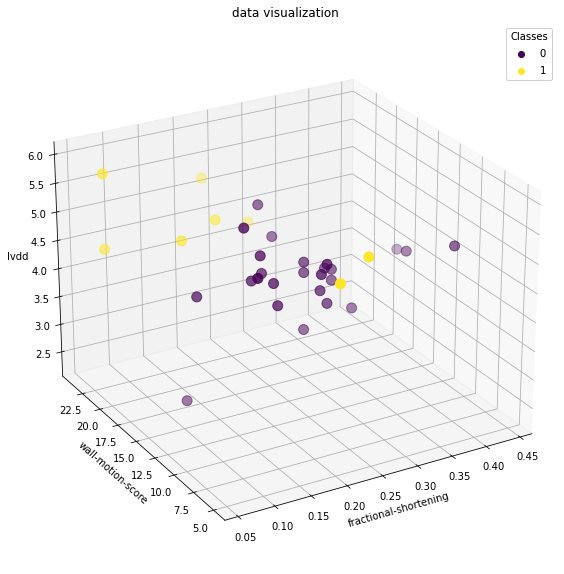

In [24]:
# более высокое среднее значение достигает наивный байесовский классификатор
# классификация была выполнена в п.9
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = X_test[4]
ys = X_test[7]
zs = X_test[6]
scatter = ax.scatter( xs, ys, zs, c=y_pred_gaus,s=100 )
ax.set_xlabel('fractional-shortening')
ax.set_ylabel('wall-motion-score')
ax.set_zlabel('lvdd')
ax.set_title('data visualization')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

ax.view_init( azim=-120, elev=25 );